In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flight_train=pd.read_excel(r"C:\Users\heman\Downloads\Data_Train.xlsx")

In [3]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_test=pd.read_excel(r"C:\Users\heman\Downloads\Test_set.xlsx")

In [5]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
final_df=pd.concat([flight_train,flight_test],ignore_index=True)

In [7]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [9]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
final_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [12]:
len(final_df.columns)

11

In [13]:
final_df.shape

(13354, 11)

In [15]:
final_df.isnull().values.any()

True

In [17]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [19]:
final_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [22]:
final_df["Airline"].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

In [25]:
final_df["Source"].value_counts()

Source
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: count, dtype: int64

In [26]:
final_df["Destination"].value_counts()

Destination
Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: count, dtype: int64

In [27]:
final_df.size

146894

In [29]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Exploratory data Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

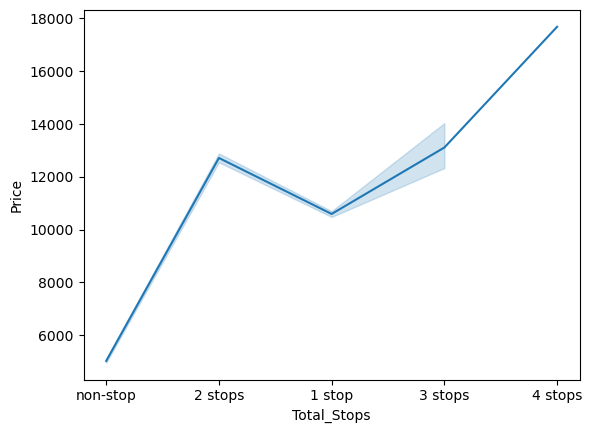

In [40]:
sns.lineplot(x=final_df["Total_Stops"],y=final_df["Price"])

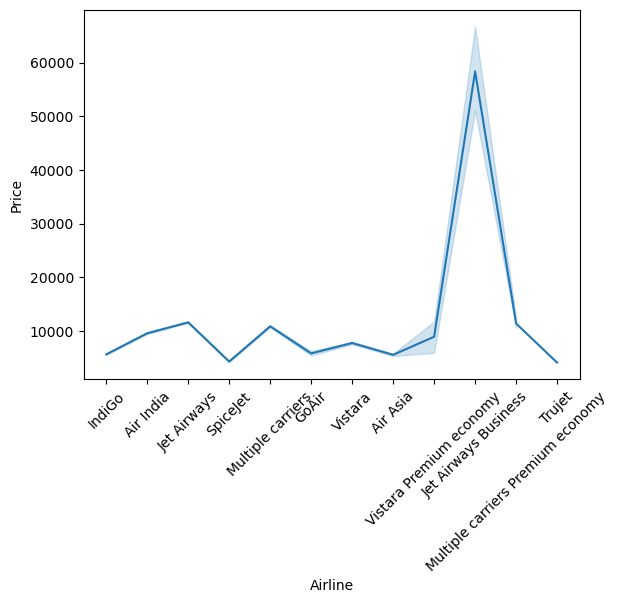

In [44]:
sns.lineplot(x=final_df["Airline"],y=final_df["Price"])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:ylabel='Price'>

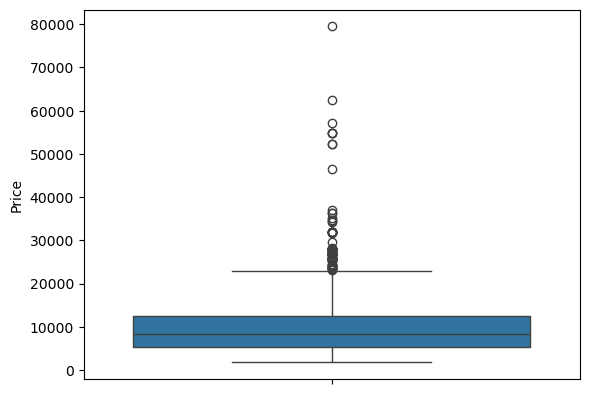

In [34]:
sns.boxplot(final_df["Price"])

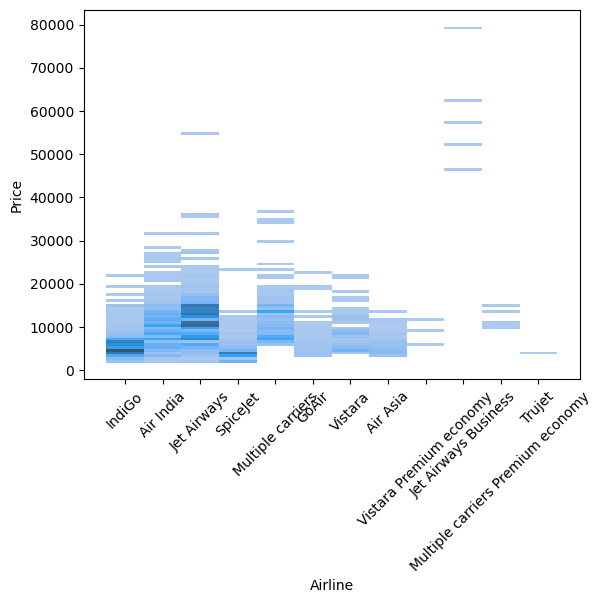

In [38]:
sns.histplot(x=final_df["Airline"],y=final_df["Price"])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Total_Stops'>

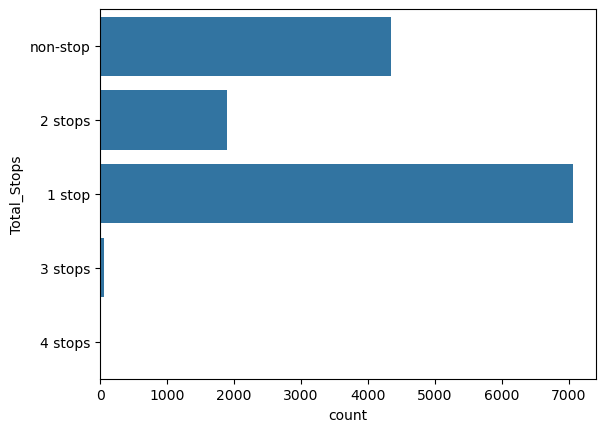

In [33]:
sns.countplot(final_df["Total_Stops"])

<AxesSubplot:xlabel='count', ylabel='Source'>

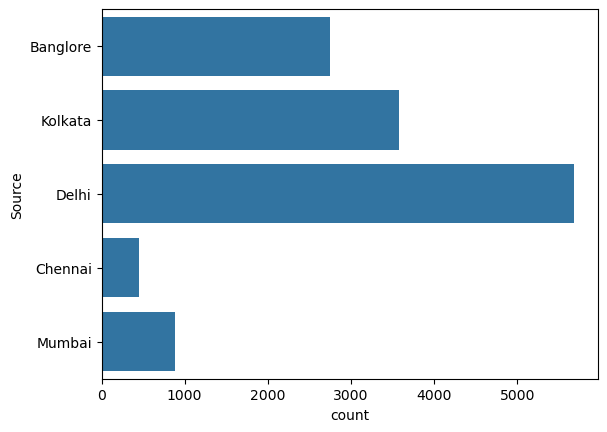

In [31]:
sns.countplot(final_df["Source"])

<AxesSubplot:xlabel='count', ylabel='Airline'>

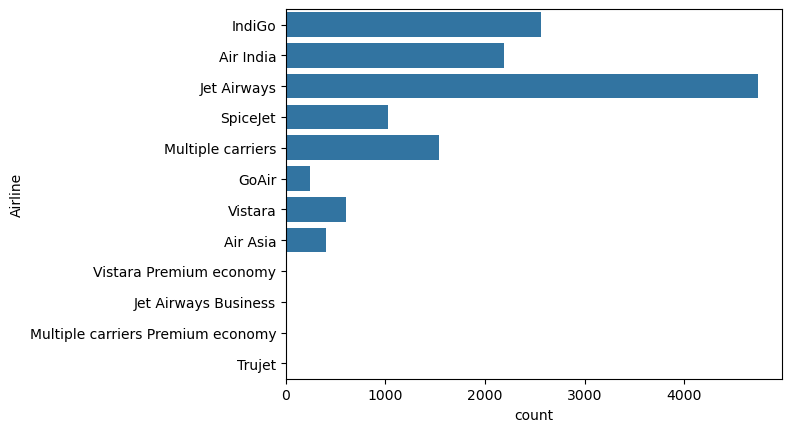

In [30]:
sns.countplot(final_df["Airline"])

# Feature Engineering

In [45]:
import missingno as msno

<AxesSubplot:>

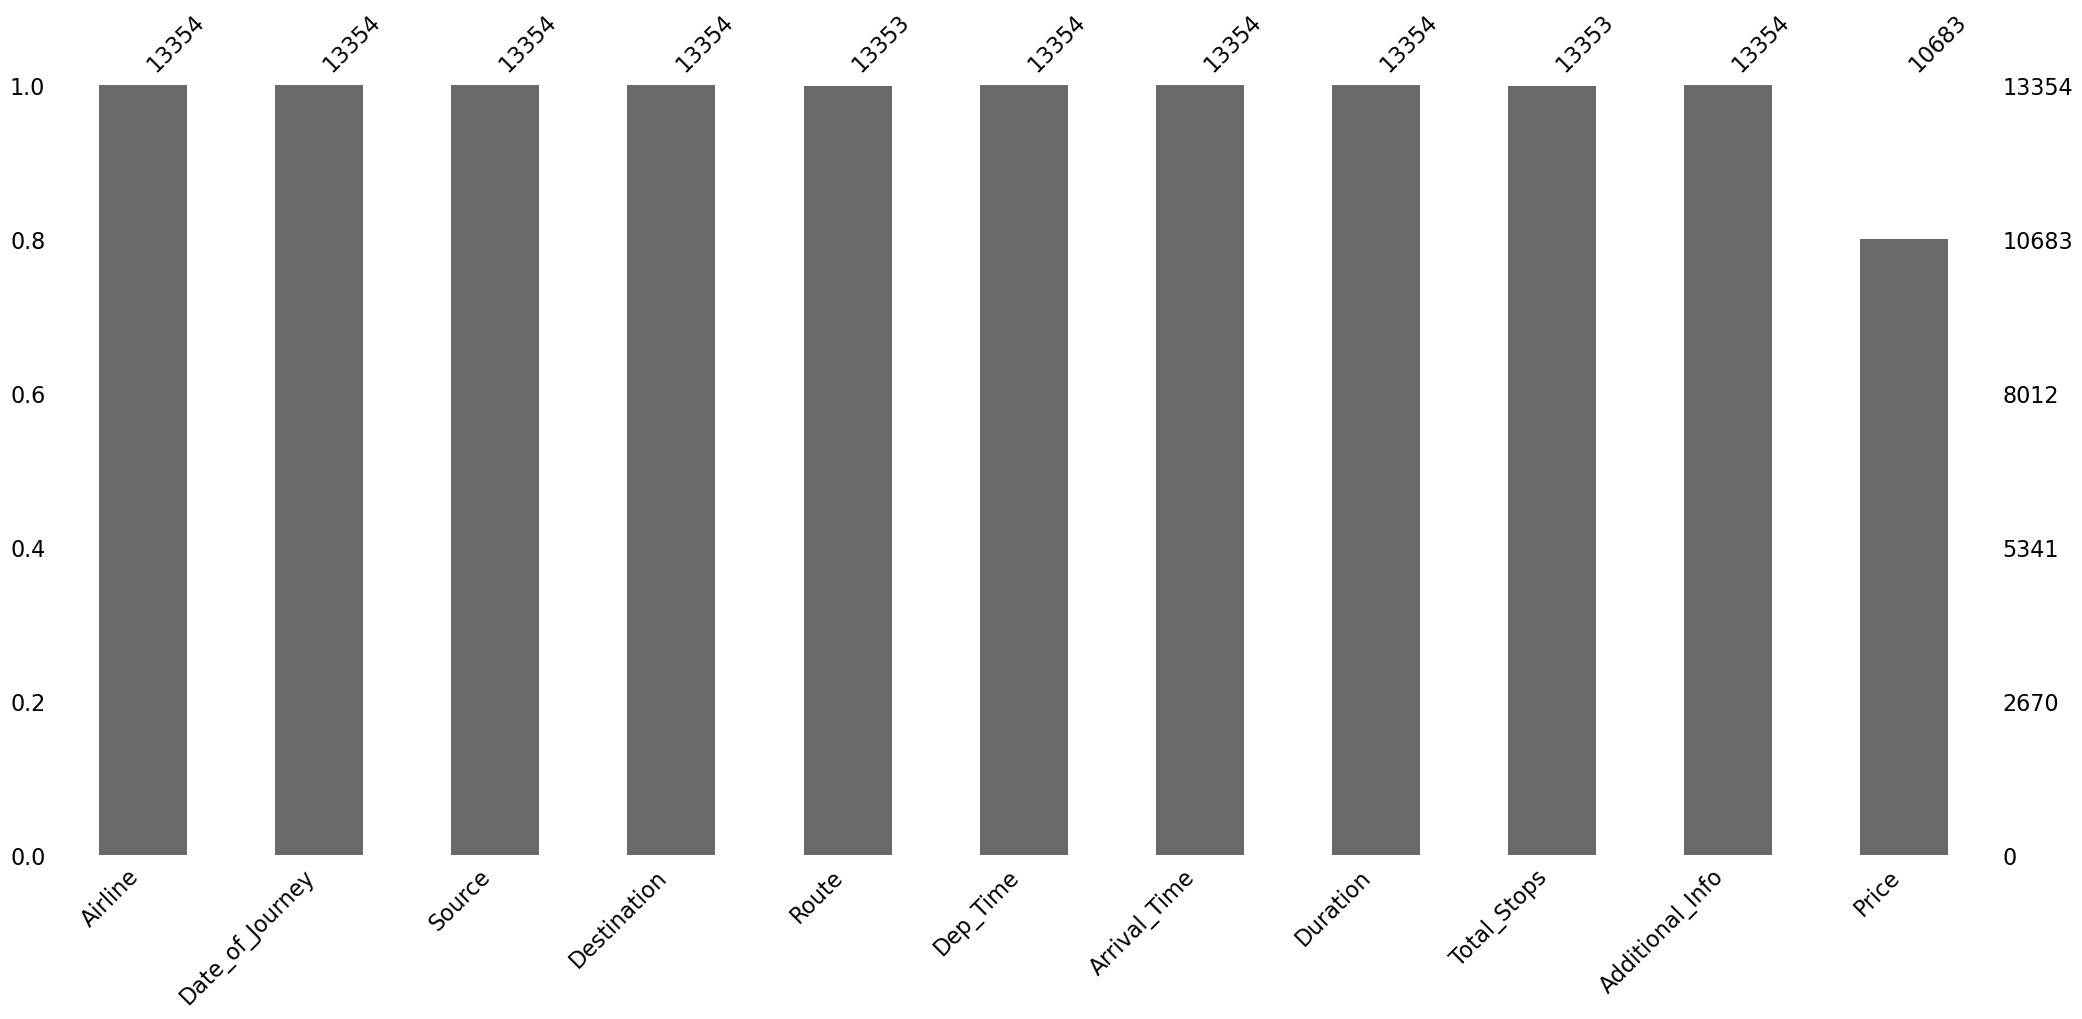

In [47]:
msno.bar(final_df)

<AxesSubplot:>

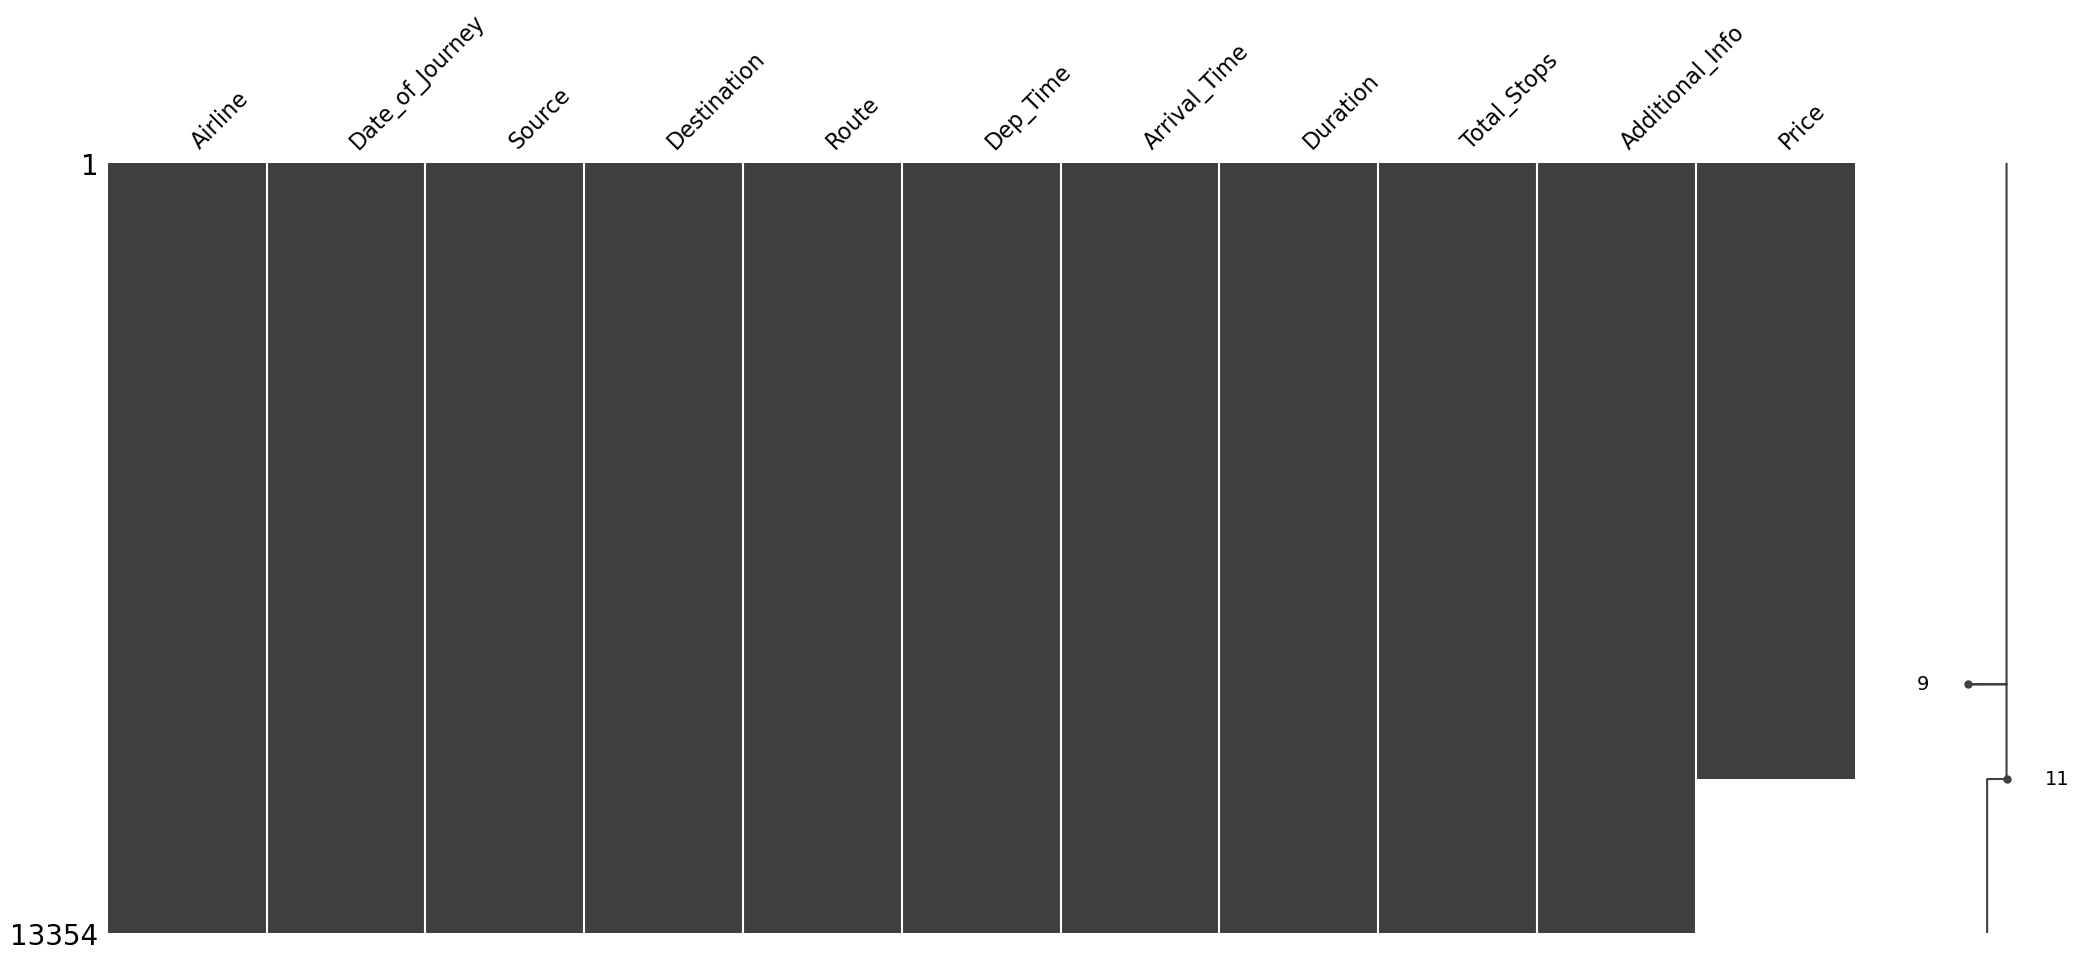

In [48]:
msno.matrix(final_df)

In [51]:
sort=final_df.sort_values("Price")

<AxesSubplot:>

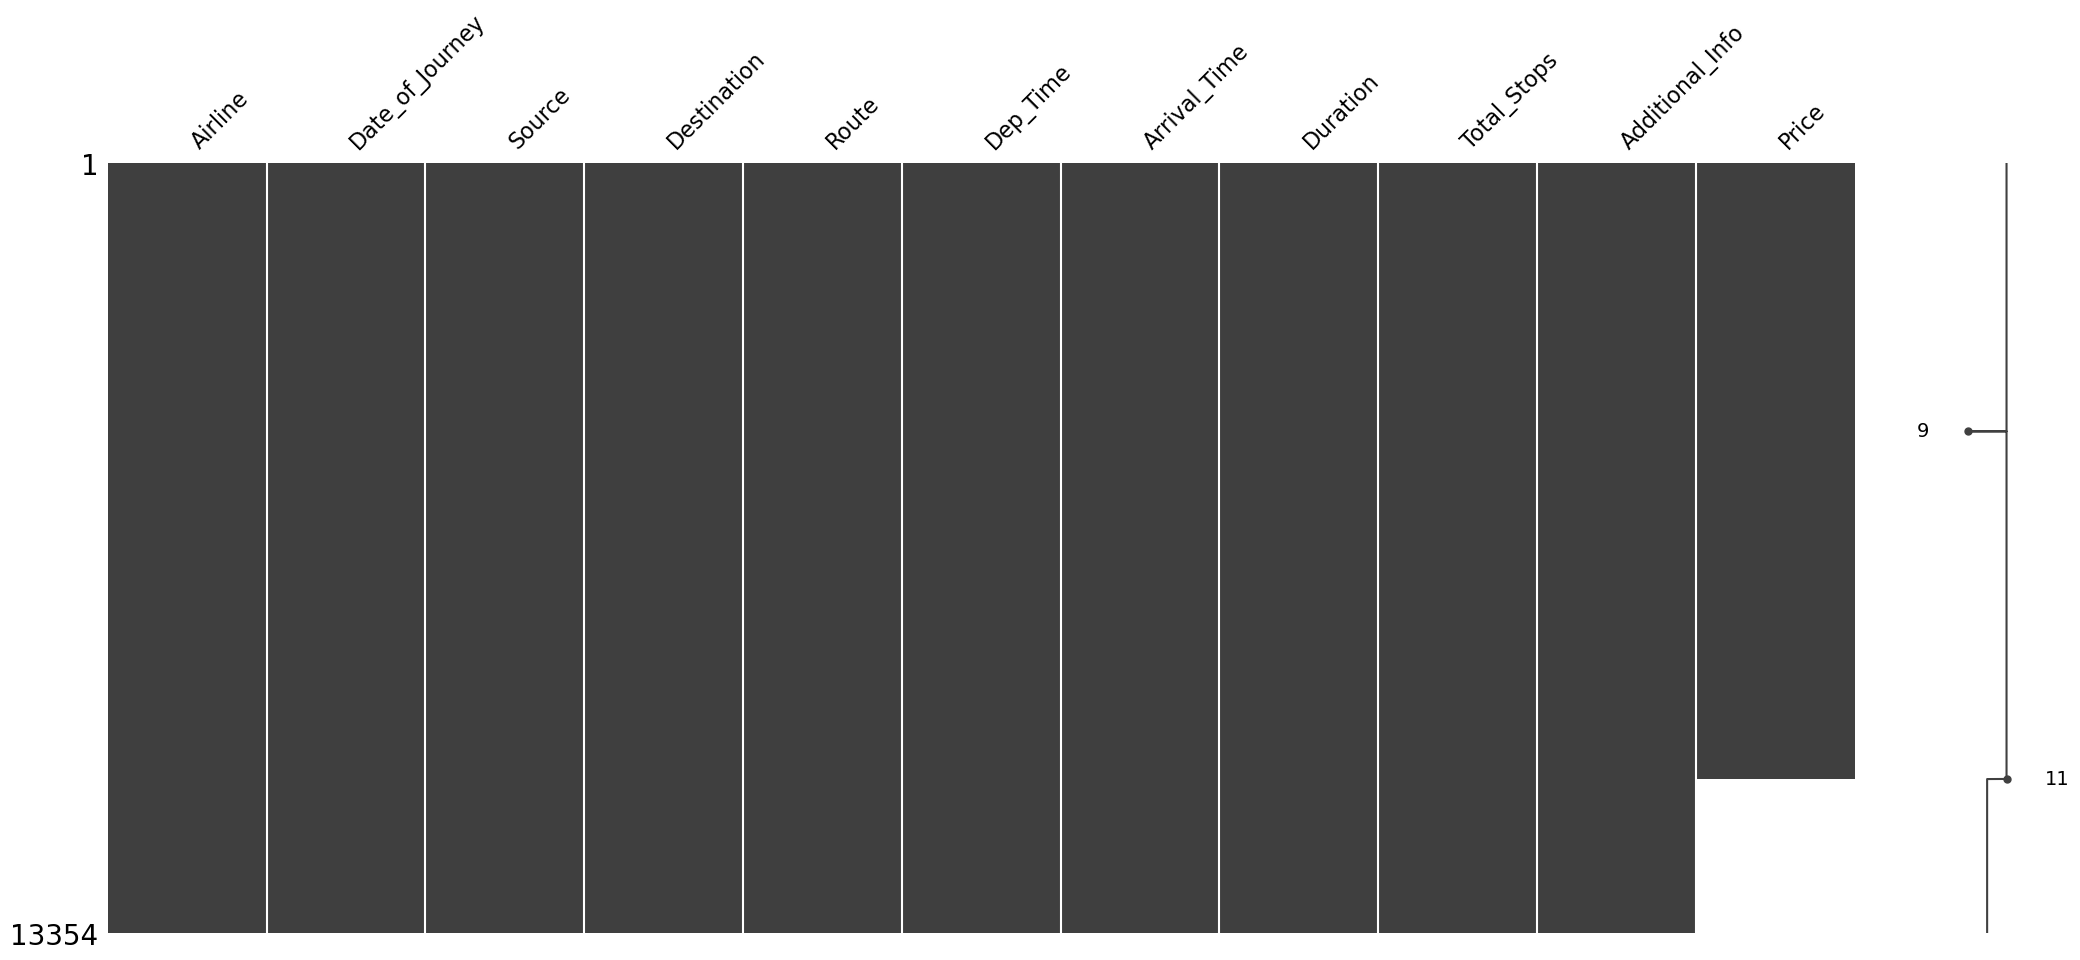

In [52]:
msno.matrix(sort)

<AxesSubplot:>

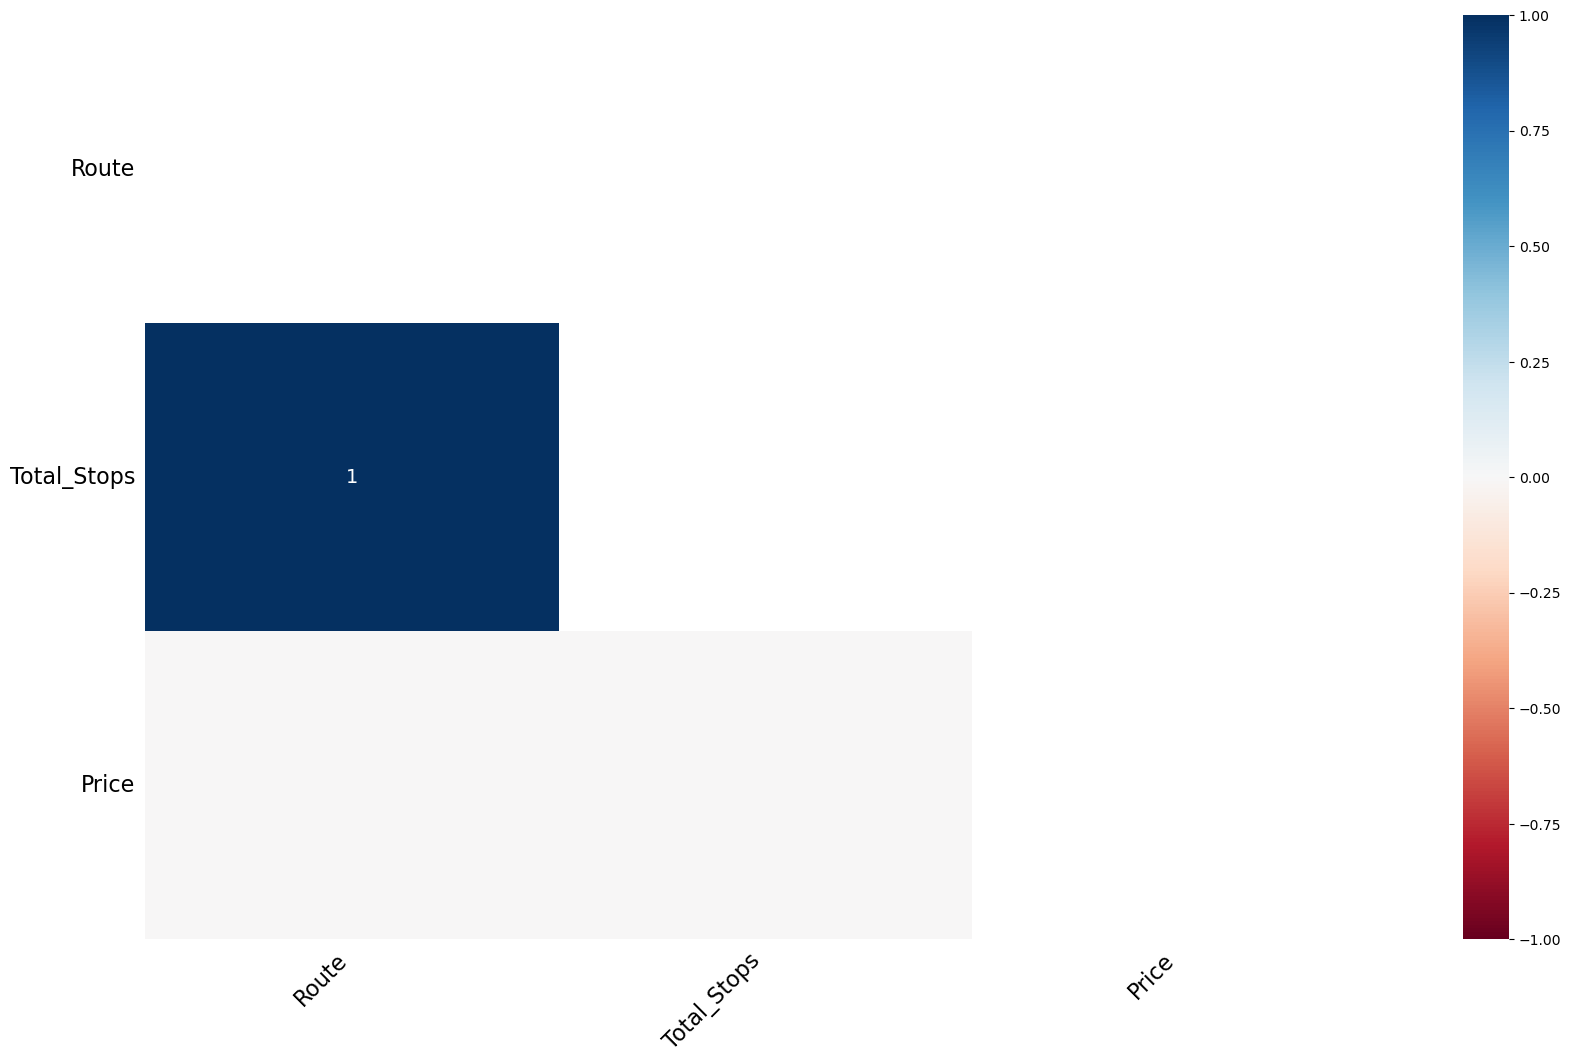

In [53]:
msno.heatmap(final_df)

In [54]:
final_df["Price"]=final_df["Price"].fillna(final_df["Price"].mean())

In [55]:
final_df["date"]=final_df["Date_of_Journey"].str.split("/").str[0]
final_df["month"]=final_df["Date_of_Journey"].str.split("/").str[1]
final_df["year"]=final_df["Date_of_Journey"].str.split("/").str[2]

In [56]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [57]:
final_df.drop("Date_of_Journey",axis=1,inplace=True)

In [58]:
final_df["date"]=final_df["date"].astype(int)
final_df["month"]=final_df["month"].astype(int)
final_df["year"]=final_df["year"].astype(int)

In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            13354 non-null  float64
 10  date             13354 non-null  int32  
 11  month            13354 non-null  int32  
 12  year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.2+ MB


In [60]:
final_df["Arrival_hour"]=final_df["Arrival_Time"].str.split(":").str[0].astype(int)
final_df["Arrival_min"]=final_df["Arrival_Time"].str.split(":").str[1].str.split(" ").str[0].astype(int)

In [61]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            13354 non-null  float64
 10  date             13354 non-null  int32  
 11  month            13354 non-null  int32  
 12  year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.3+ MB


In [63]:
final_df.drop("Arrival_Time",axis=1,inplace=True)

In [64]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [65]:
final_df["Duration_hour"]=final_df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [66]:
final_df.drop(13343,axis=0,inplace=True)

In [67]:
final_df["Duration_hour"]=final_df["Duration_hour"].astype(int)

In [68]:
final_df.drop("Duration",axis=1,inplace=True)

In [69]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897.0,24,3,2019,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662.0,1,5,2019,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882.0,9,6,2019,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218.0,12,5,2019,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302.0,1,3,2019,21,35,4


In [70]:
final_df["Dep_hour"]=final_df["Dep_Time"].str.split(":").str[0].astype(int)
final_df["Dep_min"]=final_df["Dep_Time"].str.split(":").str[1].astype(int)

In [71]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897.0,24,3,2019,1,10,2,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662.0,1,5,2019,13,15,7,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882.0,9,6,2019,4,25,19,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218.0,12,5,2019,23,30,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302.0,1,3,2019,21,35,4,16,50


In [72]:
final_df.drop("Dep_Time",axis=1,inplace=True)

In [73]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,1,10,2,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,13,15,7,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,4,25,19,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,23,30,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,2019,21,35,4,16,50


In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Route            13350 non-null  object 
 4   Total_Stops      13350 non-null  object 
 5   Additional_Info  13351 non-null  object 
 6   Price            13351 non-null  float64
 7   date             13351 non-null  int32  
 8   month            13351 non-null  int32  
 9   year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Duration_hour    13351 non-null  int32  
 13  Dep_hour         13351 non-null  int32  
 14  Dep_min          13351 non-null  int32  
dtypes: float64(1), int32(8), object(6)
memory usage: 1.2+ MB


In [75]:
final_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [76]:
final_df["Total_Stops"]=final_df["Total_Stops"].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, "nan":1, '4 stops':4})

In [77]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,1,10,2,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,5,2019,13,15,7,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9,6,2019,4,25,19,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,12,5,2019,23,30,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1,3,2019,21,35,4,16,50


In [78]:
final_df.drop("Route",axis=1,inplace=True)

In [79]:
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.000000,24,3,2019,1,10,2,22,20
1,Air India,Kolkata,Banglore,2.0,No info,7662.000000,1,5,2019,13,15,7,5,50
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.000000,9,6,2019,4,25,19,9,25
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.000000,12,5,2019,23,30,5,18,5
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.000000,1,3,2019,21,35,4,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1.0,No info,9087.064121,6,6,2019,20,25,23,20,30
13350,IndiGo,Kolkata,Banglore,0.0,No info,9087.064121,27,3,2019,16,55,2,14,20
13351,Jet Airways,Delhi,Cochin,1.0,No info,9087.064121,6,3,2019,4,25,6,21,50
13352,Air India,Delhi,Cochin,1.0,No info,9087.064121,6,3,2019,19,15,15,4,0


In [80]:
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [82]:
final_df["Additional_Info"]=lb.fit_transform(final_df["Additional_Info"])
final_df["Destination"]=lb.fit_transform(final_df["Destination"])
final_df["Source"]=lb.fit_transform(final_df["Source"])
final_df["Airline"]=lb.fit_transform(final_df["Airline"])

In [83]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour,Dep_hour,Dep_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,2,22,20
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,7,5,50
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,19,9,25
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,5,18,5
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,4,16,50


In [84]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int32  
 5   Price            13351 non-null  float64
 6   date             13351 non-null  int32  
 7   month            13351 non-null  int32  
 8   year             13351 non-null  int32  
 9   Arrival_hour     13351 non-null  int32  
 10  Arrival_min      13351 non-null  int32  
 11  Duration_hour    13351 non-null  int32  
 12  Dep_hour         13351 non-null  int32  
 13  Dep_min          13351 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 938.7 KB


In [85]:
pd.get_dummies(final_df,columns=["Additional_Info","Airline","Source","Destination"],drop_first=True)

,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour,Dep_hour,Dep_min,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,0.0,3897.000000,24,3,2019,1,10,2,22,20,...,False,False,False,False,False,False,False,False,False,True
1,2.0,7662.000000,1,5,2019,13,15,7,5,50,...,False,False,False,True,False,False,False,False,False,False
2,2.0,13882.000000,9,6,2019,4,25,19,9,25,...,False,False,True,False,False,True,False,False,False,False
3,1.0,6218.000000,12,5,2019,23,30,5,18,5,...,False,False,False,True,False,False,False,False,False,False
4,1.0,13302.000000,1,3,2019,21,35,4,16,50,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1.0,9087.064121,6,6,2019,20,25,23,20,30,...,False,False,False,True,False,False,False,False,False,False
13350,0.0,9087.064121,27,3,2019,16,55,2,14,20,...,False,False,False,True,False,False,False,False,False,False
13351,1.0,9087.064121,6,3,2019,4,25,6,21,50,...,False,False,True,False,False,True,False,False,False,False
13352,1.0,9087.064121,6,3,2019,19,15,15,4,0,...,False,False,True,False,False,True,False,False,False,False


In [86]:
# another way to get datasets
pd.get_dummies(final_df,columns=["Airline", "Source", "Destination"],drop_first = True)

,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Duration_hour,Dep_hour,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,0.0,8,3897.000000,24,3,2019,1,10,2,22,...,False,False,False,False,False,False,False,False,False,True
1,2.0,8,7662.000000,1,5,2019,13,15,7,5,...,False,False,False,True,False,False,False,False,False,False
2,2.0,8,13882.000000,9,6,2019,4,25,19,9,...,False,False,True,False,False,True,False,False,False,False
3,1.0,8,6218.000000,12,5,2019,23,30,5,18,...,False,False,False,True,False,False,False,False,False,False
4,1.0,8,13302.000000,1,3,2019,21,35,4,16,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1.0,8,9087.064121,6,6,2019,20,25,23,20,...,False,False,False,True,False,False,False,False,False,False
13350,0.0,8,9087.064121,27,3,2019,16,55,2,14,...,False,False,False,True,False,False,False,False,False,False
13351,1.0,8,9087.064121,6,3,2019,4,25,6,21,...,False,False,True,False,False,True,False,False,False,False
13352,1.0,8,9087.064121,6,3,2019,19,15,15,4,...,False,False,True,False,False,True,False,False,False,False


In [87]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int32  
 5   Price            13351 non-null  float64
 6   date             13351 non-null  int32  
 7   month            13351 non-null  int32  
 8   year             13351 non-null  int32  
 9   Arrival_hour     13351 non-null  int32  
 10  Arrival_min      13351 non-null  int32  
 11  Duration_hour    13351 non-null  int32  
 12  Dep_hour         13351 non-null  int32  
 13  Dep_min          13351 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 938.7 KB


In [88]:
final_df.isnull().values.any()

True

In [89]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
date               0
month              0
year               0
Arrival_hour       0
Arrival_min        0
Duration_hour      0
Dep_hour           0
Dep_min            0
dtype: int64

In [90]:
final_df["Price"]=final_df["Price"].fillna(final_df["Price"].median())

In [91]:
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Then handle NaNs as shown above
final_df = final_df.dropna()

In [92]:
x=final_df.drop(["Price"],axis=1)

In [93]:
y=final_df["Price"]

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [105]:
from sklearn.linear_model import LinearRegression

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
lr=LinearRegression()

In [107]:
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
predictionlr=lr.predict(x_test)

In [115]:
print(mean_absolute_error(predictionlr,y_test))
print(mean_squared_error(predictionlr,y_test))
print(np.sqrt(mean_squared_error(predictionlr,y_test)))
print(r2_score(y_test,predictionlr))

2375.3807195757204
10425211.225087723
3228.809567795494
0.35111847572331234


In [125]:
from sklearn.neighbors import KNeighborsRegressor

In [126]:
KNN=KNeighborsRegressor(n_neighbors=6)

In [127]:
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [128]:
prdictKNN=KNN.predict(x_test)

In [129]:
print(mean_absolute_error(prdictKNN,y_test))
print(mean_squared_error(prdictKNN,y_test))
print(np.sqrt(mean_squared_error(prdictKNN,y_test)))
print(r2_score(y_test,prdictKNN))

2019.9818394500398
7998865.374983223
2828.2265423730155
0.5021380531347979


Text(0, 0.5, 'error')

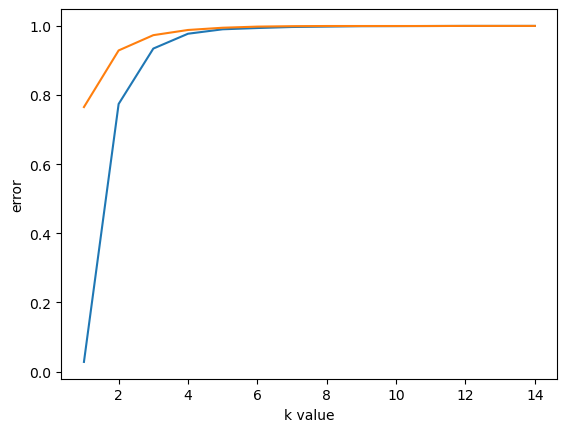

In [130]:
error1=[]
error2=[]
for i in range(1,15):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    pred1=KNN.predict(x_train)
    error1.append(np.mean(pred1!=y_train))
    pred2=KNN.predict(x_test)
    error2.append(np.mean(pred2!=y_test))
plt.plot(range(1,15),error1,label="training_error")
plt.plot(range(1,15),error2,label="test_error")
plt.xlabel("k value")
plt.ylabel("error")

In [131]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
tree_model=DecisionTreeRegressor()

In [133]:
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [134]:
from sklearn import tree

In [136]:
prediction_tree=tree_model.predict(x_test)

In [137]:
print(mean_absolute_error(y_test,prediction_tree))
print(mean_squared_error(y_test,prediction_tree))
print(np.sqrt(mean_squared_error(prediction_tree,y_test)))
print(r2_score(y_test,prediction_tree))

1659.8241859054074
8829279.941273676
2971.4104296232244
0.4504517459778338


In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rm=RandomForestRegressor()

In [140]:
rm.fit(x_train,y_train)

RandomForestRegressor()

In [141]:
prediction=rm.predict(x_test)

In [143]:
print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(np.sqrt(mean_squared_error(prediction,y_test)))
print(r2_score(y_test,prediction))

1494.7113966419843
5192393.92529046
2278.6824976925723
0.6768172450281326
